#  DSC Dataset

# Problem Statement/ Objective:

Your client is an Insurance company and they need your help in building a model to predict whether the policyholder (customer) will pay the next premium on time or not.


# Variables

* id : Unique ID of the policy
* perc_premium_paid_by_cash_credit : Percentage of premium amount paid by cash or credit card
* age_in_days : Age in days of policyholder
* Income : Monthly Income of policy holder
* Count_3-6_months_late : No of premiums late by 3 to 6 months
* Count_6-12_months_late : No of premiums late by 6 to 12 months
* Count_more_than_12_months_late : No of premiums late by more than 12 months
* application_underwriting_score : Underwriting Score of the applicant at the time of application 
* no_of_premiums_paid : Total premiums paid on time till now
* sourcing_channel : Sourcing channel for application
* residence_area_type : Area type of Residence (Urban/Rural)
* target : 1 - premium paid on time, 0 - Premium not paid on time (Target Variable to be predicted)


In [5]:
#installing python linraries
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn

You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python36\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python36\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python36\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python36\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python36\python.exe -m pip install --upgrade pip' command.


In [6]:
# importing required libraries and modules

In [7]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
import os


%matplotlib inline

In [9]:
import pandas as pd
# accessing .csv file from pandas 
df=pd.read_csv(r"DSC_Dataset.csv")

training=df.sample(frac=0.8)
testing=df.drop(training.index)
training.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
828,37935,1.000,16432,170140,1.0,3.0,1.0,99.68,5,C,Rural,0
15229,75300,0.670,19352,192450,0.0,0.0,0.0,99.76,10,A,Urban,1
30882,4203,0.808,17535,111130,0.0,0.0,0.0,98.60,14,D,Urban,1
56188,1637,0.122,21181,234100,2.0,0.0,0.0,99.22,16,B,Rural,1
64302,59577,0.410,27752,195150,0.0,0.0,0.0,98.78,15,B,Urban,1


In [10]:
testing.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
8,93730,0.621,9868,92520,0.0,0.0,0.0,99.58,4,A,Urban,1
15,91820,0.963,12788,90140,1.0,0.0,0.0,99.06,9,A,Urban,1
18,68260,0.012,16433,87530,0.0,0.0,0.0,NaN,5,A,Rural,1
19,4043,0.000,11687,152610,1.0,2.0,1.0,99.53,5,C,Urban,0
21,90347,0.229,17895,364950,0.0,0.0,0.0,99.07,10,A,Rural,1


In [11]:
training.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'target'],
      dtype='object')

In [12]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63882 entries, 828 to 63203
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                63882 non-null  int64  
 1   perc_premium_paid_by_cash_credit  63882 non-null  float64
 2   age_in_days                       63882 non-null  int64  
 3   Income                            63882 non-null  int64  
 4   Count_3-6_months_late             63801 non-null  float64
 5   Count_6-12_months_late            63801 non-null  float64
 6   Count_more_than_12_months_late    63801 non-null  float64
 7   application_underwriting_score    61525 non-null  float64
 8   no_of_premiums_paid               63882 non-null  int64  
 9   sourcing_channel                  63882 non-null  object 
 10  residence_area_type               63882 non-null  object 
 11  target                            63882 non-null  int64  
dtypes:

* Inference:

Independent variables are int or float , sourcing channel and residence area type are categorical and
the target variable is int

In [13]:
testing.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'target'],
      dtype='object')

In [14]:
df["age_in_years"]=(df["age_in_days"]/365).astype(int)

In [15]:
df=df[["age_in_years","age_in_days","id","perc_premium_paid_by_cash_credit","Income","Count_3-6_months_late","Count_6-12_months_late","Count_more_than_12_months_late","application_underwriting_score","no_of_premiums_paid","sourcing_channel","residence_area_type","target"]]
df.head()

,age_in_years,age_in_days,id,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,33,12058,110936,0.429,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,59,21546,41492,0.010,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,48,17531,31300,0.917,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,42,15341,19415,0.049,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,86,31400,99379,0.052,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


In [16]:
# now datset has less complex data for age of the customer or policyholder

* Approach:

To go forward we will consider all posible cases... like it is much possible that an insurer to make a policy persistently-related prediction at the submisssion of proposal and then use it- along with the application underwriting parameters ...trying to get a good predictive algorithm we'll try to keep the dataset as homogeneous as possible and for that we're now goung to seperate the given dataset into different homogeneous sub-datasets.
going fuurther with the case... the life insurer would always want to improve persistency which can be as
* improving premium collection of the same month
* improve premium collection within grace period
* reducing lapses
* improving revival rate of lapsed policies
* reducing surrenders

Each of the above can be helping in building a more predictive model... so to determine a target event we require to  define an associate time limit... here we'll consider 90days -- premium payment within 90 days of the due date i.e. no applications under the score of 90 would be insured. 

In [17]:
# to get idea of all different sourcing channels
sorted(training.sourcing_channel.unique())

['A', 'B', 'C', 'D', 'E']

In [18]:
# to check residence areas of customers
sorted(training.residence_area_type.unique())

['Rural', 'Urban']

In [19]:
# counting no of null or empty values in the training dataset so far
training.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 81
Count_6-12_months_late                81
Count_more_than_12_months_late        81
application_underwriting_score      2357
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
target                                 0
dtype: int64

In [20]:
training[training["application_underwriting_score"]<90].shape[0]==0

True

* Proceeding Further with approach now we'll make our dataset more concise by rectifying the three delayed premium payments count value to their median value or the highest frequency value among the three i.e. zero

# Plotting Graph

# EDA with Data Visualisation

* Exploratory Data Analysis 
 
using data visualisation

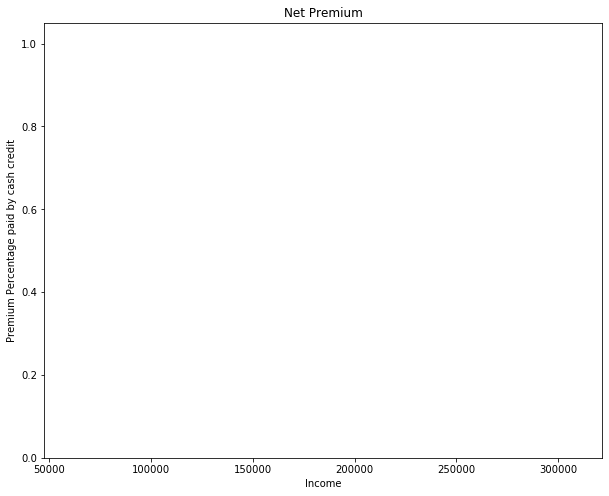

In [124]:
import pandas as pd
# accessing .csv file from pandas 
df=pd.read_csv(r"DSC_Dataset.csv")
import matplotlib.pyplot as plt

training=df.sample(frac=0.8)
testing=df.drop(training.index)

income=training["Income"].head(26)
premium=training["perc_premium_paid_by_cash_credit"].head(26)

# size of the figure
fig=plt.figure(figsize=(10,8)) 

x=list(training.Income[0:10])
y=list(training.perc_premium_paid_by_cash_credit[0:10])
plt.bar(x,y,color='g')
plt.xlabel("Income")
plt.ylabel("Premium Percentage paid by cash credit")
plt.title("Net Premium")
# showing the plot
plt.show()

In [125]:
training["Income"].value_counts().plot.bar()
# plt.show()

Error in callback <function flush_figures at 0x000002C6A9500C80> (for post_execute):


KeyboardInterrupt: 

In [126]:
training

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
13253,20486,0.114,16801,270080,0.0,0.0,0.0,99.10,16,A,Urban,1
79688,4892,0.040,20455,234080,0.0,0.0,0.0,99.14,11,A,Rural,1
3553,98818,0.009,23731,60120,0.0,0.0,0.0,99.86,17,A,Rural,1
49869,81204,0.035,17530,102610,0.0,0.0,0.0,98.65,9,C,Urban,1
31818,5903,0.371,21906,127400,0.0,0.0,0.0,98.84,16,B,Urban,0
...,...,...,...,...,...,...,...,...,...,...,...,...
71753,112479,0.313,14972,315150,1.0,0.0,0.0,99.05,13,A,Urban,1
62672,76257,0.008,22277,270030,0.0,0.0,0.0,99.47,18,A,Urban,1
38103,80724,0.126,14980,262600,0.0,0.0,0.0,99.75,10,D,Urban,1
73905,83003,0.161,16440,89060,1.0,0.0,0.0,99.60,11,C,Urban,1


In [40]:
sns.displot(training["age_in_days"])

AttributeError: module 'seaborn' has no attribute 'displot'

# Pie Chart

In [3]:
income=[]
region=[]

# plotting pie chart of customers or policy holders region
for row in training:
    income.append(row[0])
    region.append(row[5])

# Show percentages for every pie.
# Specify radius to increase chart size

plt.pie(region,labels= region,shadow=True, autopct="%1.1f%%",radius=2)
plt.show()

IndexError: string index out of range

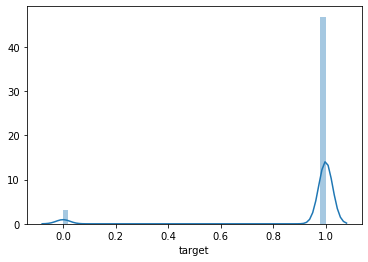

In [44]:
import seaborn as sns
sns.distplot(training["target"])

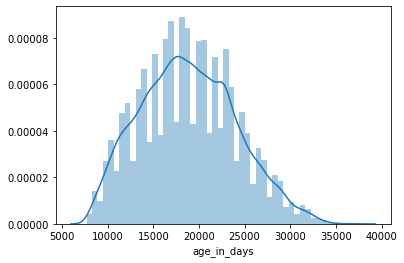

In [45]:
sns.distplot(training["age_in_days"])

In [148]:
training.fillna(0,inplace=True)


In [114]:
training


,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
19115,63236,0.751,13876,161000,0.0,0.0,0.0,99.59,4,D,Rural,1
6400,95349,0.002,22645,159030,0.0,0.0,0.0,99.03,6,B,Rural,1
63849,25420,0.039,26288,105060,0.0,0.0,0.0,99.28,14,A,Rural,1
56186,37685,0.068,18625,249130,0.0,0.0,0.0,99.14,11,D,Urban,1
467,5862,0.052,17897,752520,0.0,0.0,0.0,99.72,11,D,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
51333,10644,0.645,9861,198130,0.0,0.0,0.0,99.51,10,A,Rural,0
37473,22011,0.369,12423,150140,0.0,0.0,0.0,98.84,10,A,Urban,1
3273,105650,0.072,29944,136250,0.0,0.0,0.0,99.49,16,A,Urban,1
68073,109883,0.285,20814,48120,0.0,0.0,0.0,98.48,9,A,Rural,1


In [145]:
training.isnull().sum()

perc_premium_paid_by_cash_credit     0
age_in_days                          0
Income                               0
Count_3-6_months_late               19
Count_6-12_months_late              19
Count_more_than_12_months_late      19
application_underwriting_score       0
no_of_premiums_paid                  0
sourcing_channel                     0
residence_area_type                  0
target                               0
dtype: int64

In [146]:
testing.fillna(0,inplace=True)

In [147]:
testing.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
target                              0
dtype: int64

In [118]:
#Checking for duplicate data in the dataset
dup=training.duplicated()
print(dup.sum())
training[dup]

0


,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target


In [129]:
testing

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
9,84844,0.908,23008,107180,2.0,0.0,0.0,98.91,11,A,Rural,0
11,51808,0.033,16075,122060,0.0,0.0,0.0,97.03,7,B,Urban,1
14,42421,0.027,16430,114110,0.0,0.0,1.0,98.70,13,D,Urban,1
16,64685,0.055,23010,410310,0.0,0.0,0.0,99.66,10,A,Urban,1
17,60263,0.125,22639,315110,0.0,0.0,0.0,99.31,14,A,Rural,1
...,...,...,...,...,...,...,...,...,...,...,...,...
79817,4719,0.871,18624,501120,0.0,0.0,0.0,99.05,18,D,Urban,1
79820,66395,0.137,18262,320350,0.0,0.0,0.0,99.36,9,D,Rural,1
79827,68247,0.634,11688,105070,0.0,0.0,0.0,98.83,7,A,Urban,1
79838,105366,0.016,20446,155120,0.0,0.0,0.0,99.81,8,A,Urban,1


* Inference:
There is no duplication of data in the given dataset
    

# linear and logistic regression

In [67]:
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.preprocessing import StandardScaler, LabelEncoder

# from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,plot_confusion_matrix, classification_report, log_loss
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC

In [130]:
training

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
13253,20486,0.114,16801,270080,0.0,0.0,0.0,99.10,16,A,Urban,1
79688,4892,0.040,20455,234080,0.0,0.0,0.0,99.14,11,A,Rural,1
3553,98818,0.009,23731,60120,0.0,0.0,0.0,99.86,17,A,Rural,1
49869,81204,0.035,17530,102610,0.0,0.0,0.0,98.65,9,C,Urban,1
31818,5903,0.371,21906,127400,0.0,0.0,0.0,98.84,16,B,Urban,0
...,...,...,...,...,...,...,...,...,...,...,...,...
71753,112479,0.313,14972,315150,1.0,0.0,0.0,99.05,13,A,Urban,1
62672,76257,0.008,22277,270030,0.0,0.0,0.0,99.47,18,A,Urban,1
38103,80724,0.126,14980,262600,0.0,0.0,0.0,99.75,10,D,Urban,1
73905,83003,0.161,16440,89060,1.0,0.0,0.0,99.60,11,C,Urban,1


In [131]:
training=training.drop(["id"],axis=1)

In [ ]:
sns.heatmap(training.isnull())

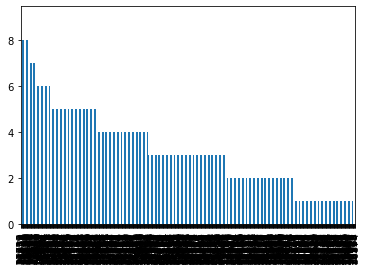

In [70]:
training["age_in_days"].value_counts().plot.bar()

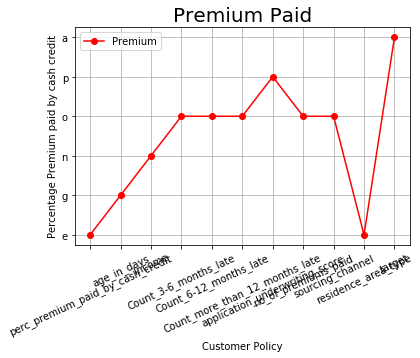

In [61]:
x=[]
y=[]
for row in training:
        x.append(row)
for column in training:
        y.append(column[1])
  
plt.plot(x, y, color = 'r',marker = 'o',label = "Premium")
  
plt.xticks(rotation = 25)
plt.xlabel('Customer Policy')
plt.ylabel('Percentage Premium paid by cash credit')
plt.title('Premium Paid', fontsize = 20)
plt.grid()
plt.legend()
plt.show()

# Handling the Outliers

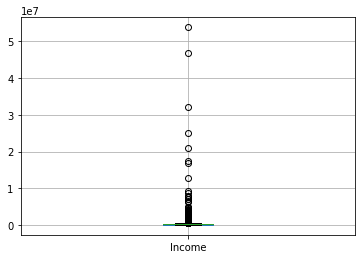

In [14]:
training.boxplot(column="Income")
plt.show()

In [134]:
training


,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
13253,0.114,16801,270080,0.0,0.0,0.0,99.10,16,A,Urban,1
79688,0.040,20455,234080,0.0,0.0,0.0,99.14,11,A,Rural,1
3553,0.009,23731,60120,0.0,0.0,0.0,99.86,17,A,Rural,1
49869,0.035,17530,102610,0.0,0.0,0.0,98.65,9,C,Urban,1
31818,0.371,21906,127400,0.0,0.0,0.0,98.84,16,B,Urban,0
...,...,...,...,...,...,...,...,...,...,...,...
71753,0.313,14972,315150,1.0,0.0,0.0,99.05,13,A,Urban,1
62672,0.008,22277,270030,0.0,0.0,0.0,99.47,18,A,Urban,1
38103,0.126,14980,262600,0.0,0.0,0.0,99.75,10,D,Urban,1
73905,0.161,16440,89060,1.0,0.0,0.0,99.60,11,C,Urban,1


In [133]:
training=training[training["application_underwriting_score"]>90]

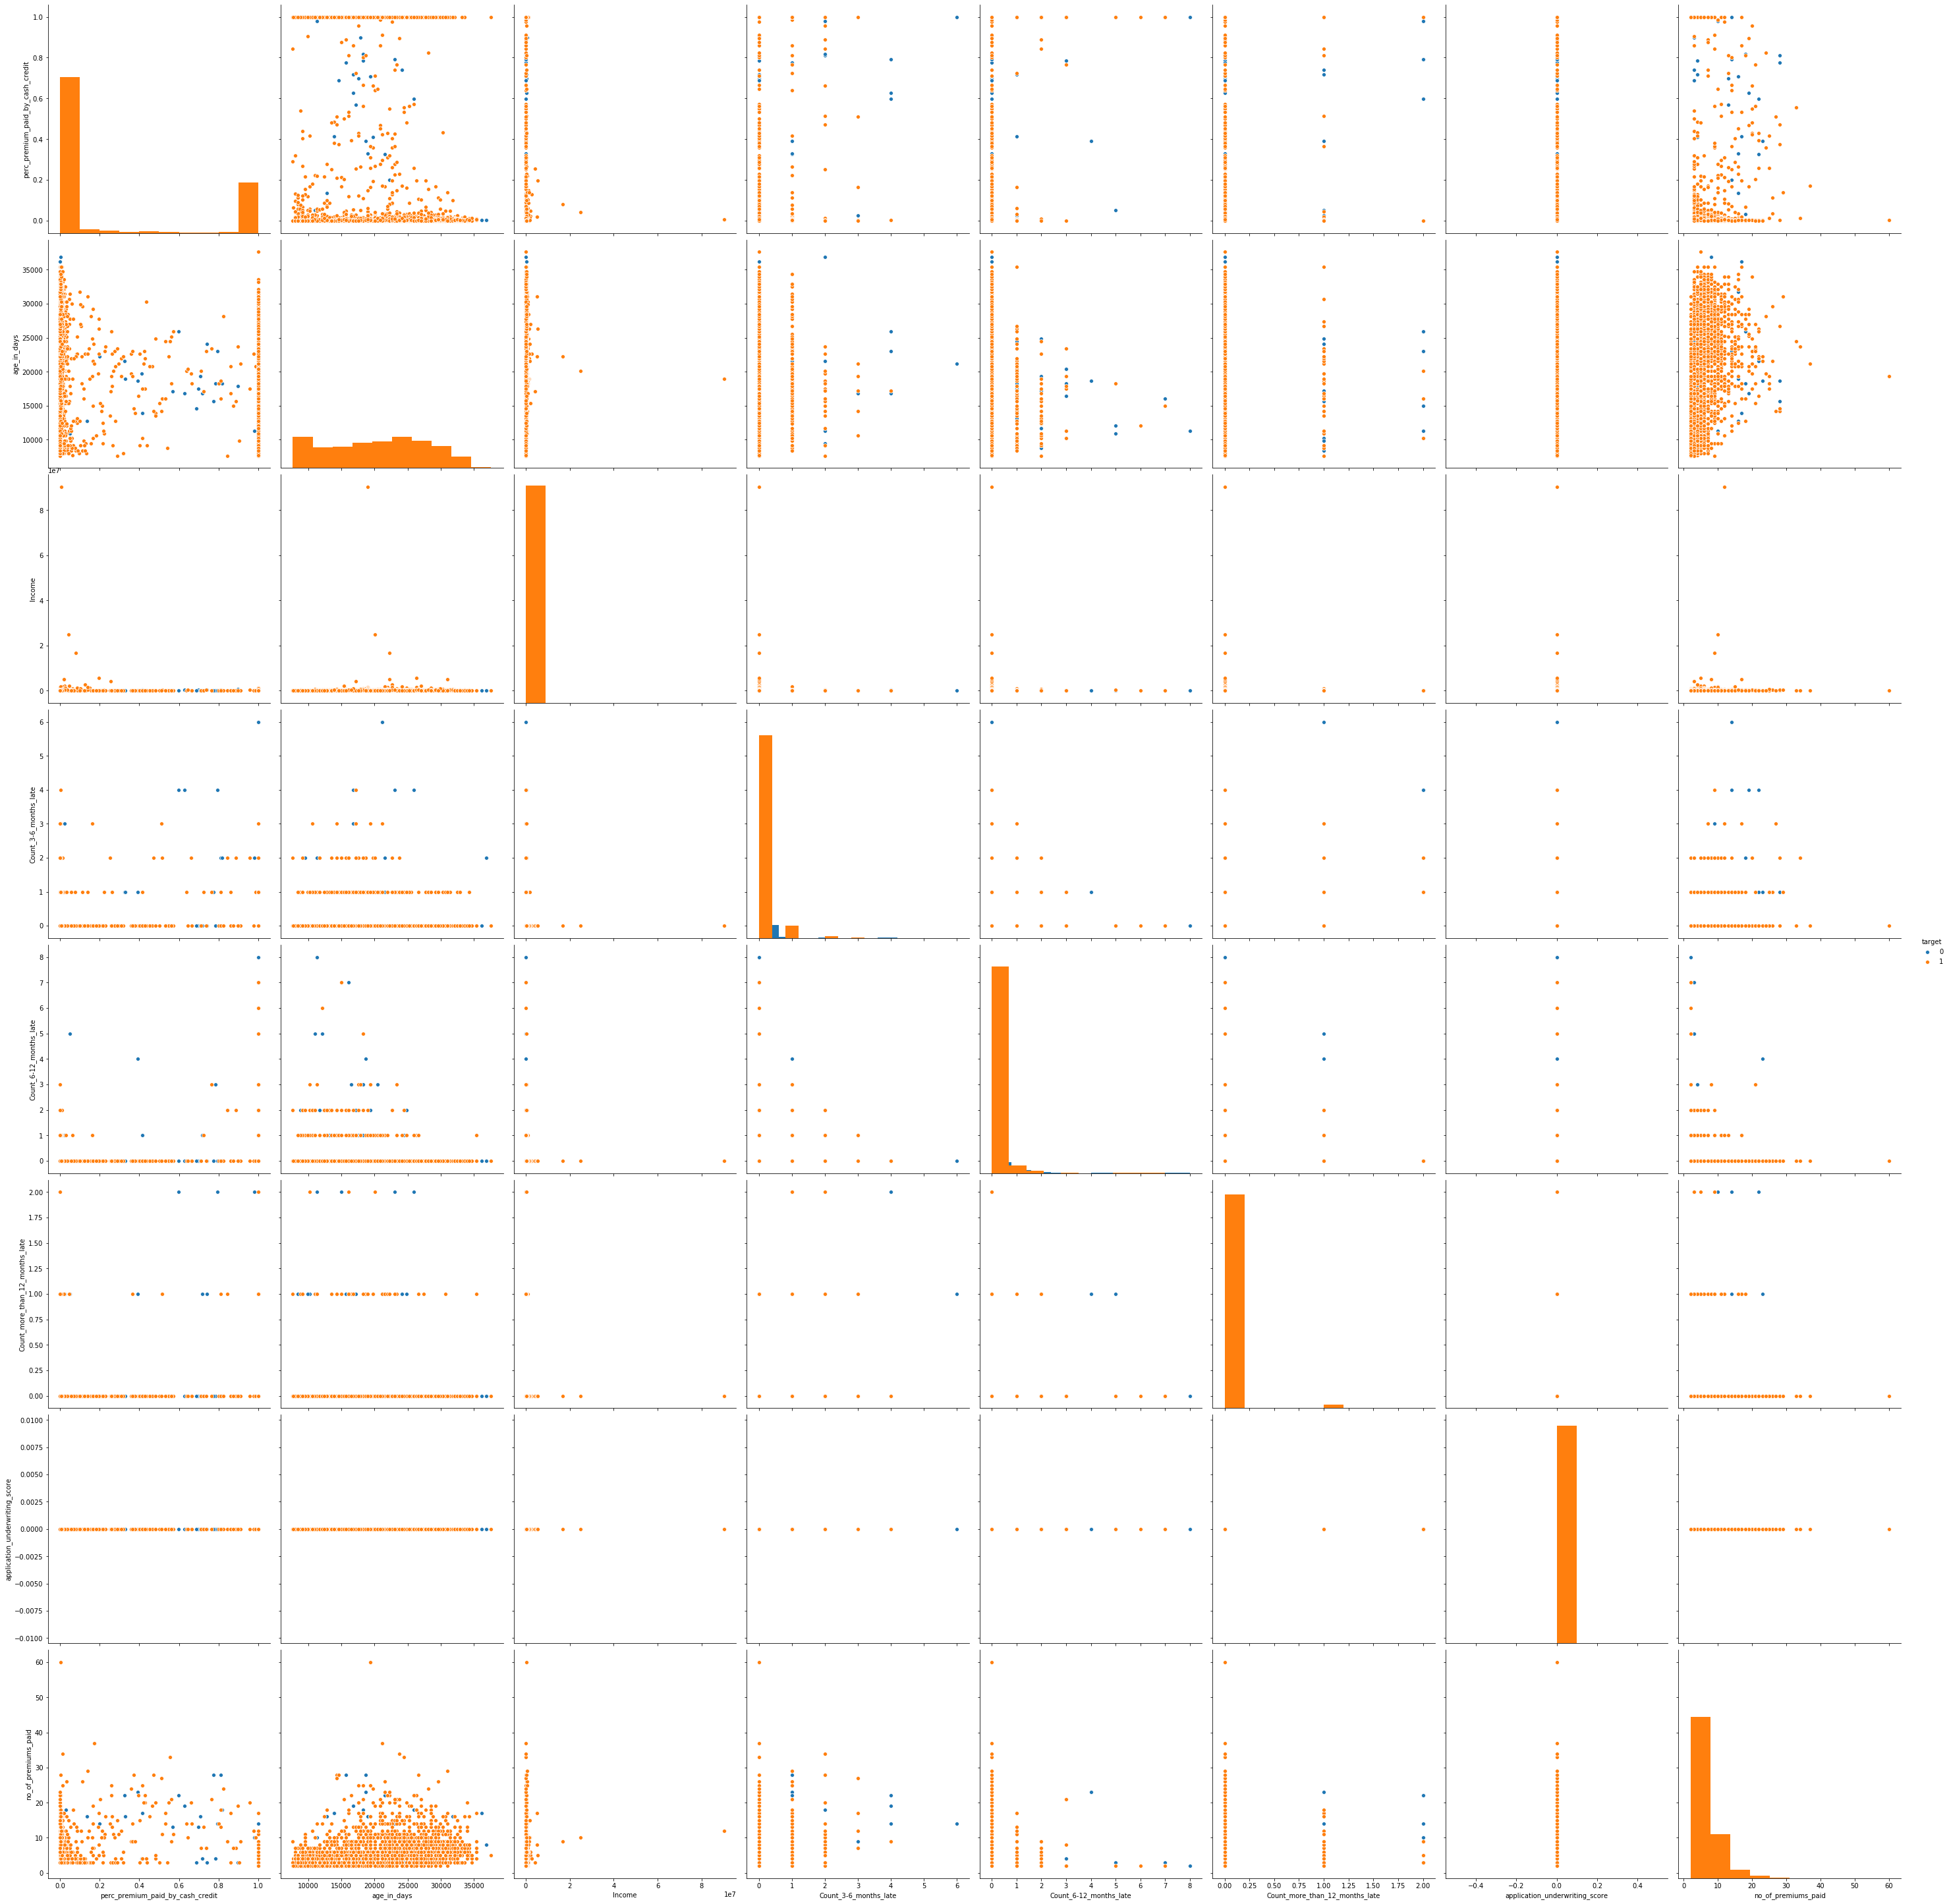

In [64]:
sns.pairplot(training,hue="target",height=5,diag_kind="hist")

In [72]:
#defining remove outlier function
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5+IQR)
    upper_range=Q3+(1.5+IQR)
    return lower_range,upper_range

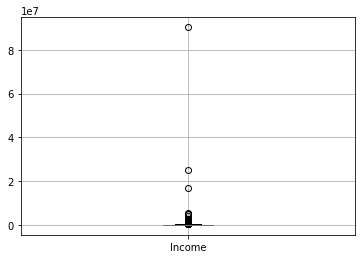

In [73]:
training.boxplot(column=["Income"])
plt.show()

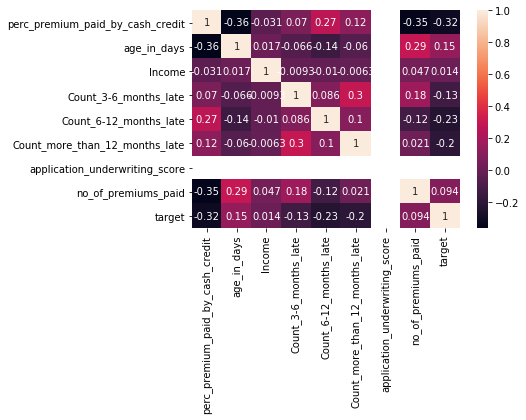

In [74]:
sns.heatmap(training.corr(),annot=True)

# Preprocesssing the data

In [149]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61491 entries, 13253 to 35484
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   perc_premium_paid_by_cash_credit  61491 non-null  float64
 1   age_in_days                       61491 non-null  int64  
 2   Income                            61491 non-null  int64  
 3   Count_3-6_months_late             61491 non-null  float64
 4   Count_6-12_months_late            61491 non-null  float64
 5   Count_more_than_12_months_late    61491 non-null  float64
 6   application_underwriting_score    61491 non-null  float64
 7   no_of_premiums_paid               61491 non-null  int64  
 8   sourcing_channel                  61491 non-null  object 
 9   residence_area_type               61491 non-null  object 
 10  target                            61491 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 5.6+ MB


In [150]:
training

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
13253,0.114,16801,270080,0.0,0.0,0.0,99.10,16,A,Urban,1
79688,0.040,20455,234080,0.0,0.0,0.0,99.14,11,A,Rural,1
3553,0.009,23731,60120,0.0,0.0,0.0,99.86,17,A,Rural,1
49869,0.035,17530,102610,0.0,0.0,0.0,98.65,9,C,Urban,1
31818,0.371,21906,127400,0.0,0.0,0.0,98.84,16,B,Urban,0
...,...,...,...,...,...,...,...,...,...,...,...
71753,0.313,14972,315150,1.0,0.0,0.0,99.05,13,A,Urban,1
62672,0.008,22277,270030,0.0,0.0,0.0,99.47,18,A,Urban,1
38103,0.126,14980,262600,0.0,0.0,0.0,99.75,10,D,Urban,1
73905,0.161,16440,89060,1.0,0.0,0.0,99.60,11,C,Urban,1


In [151]:
testing.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
count,15971.000000,15971.000000,15971.000000,1.597100e+04,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000
mean,57264.083464,0.313133,18794.012272,2.065003e+05,0.244694,0.078768,0.058356,95.446301,10.888172,0.939453
std,32871.251681,0.335288,5173.218714,2.621491e+05,0.691288,0.452151,0.297938,18.593417,5.187519,0.238505
min,3.000000,0.000000,7672.000000,2.403000e+04,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,28931.000000,0.034000,14973.000000,1.051400e+05,0.000000,0.000000,0.000000,98.740000,7.000000,1.000000
50%,57586.000000,0.165000,18624.000000,1.660700e+05,0.000000,0.000000,0.000000,99.180000,10.000000,1.000000
75%,85522.000000,0.541000,22635.000000,2.520650e+05,0.000000,0.000000,0.000000,99.520000,14.000000,1.000000
max,114049.000000,1.000000,36874.000000,2.098603e+07,8.000000,13.000000,6.000000,99.890000,55.000000,1.000000


# Feature Selection

In [152]:
X=training[["age_in_days","perc_premium_paid_by_cash_credit","Income","Count_3-6_months_late","Count_6-12_months_late","Count_more_than_12_months_late","application_underwriting_score","no_of_premiums_paid"]].values
Y=training[["target"]].values

In [153]:
X

array([[1.6801e+04, 1.1400e-01, 2.7008e+05, ..., 0.0000e+00, 9.9100e+01,
        1.6000e+01],
       [2.0455e+04, 4.0000e-02, 2.3408e+05, ..., 0.0000e+00, 9.9140e+01,
        1.1000e+01],
       [2.3731e+04, 9.0000e-03, 6.0120e+04, ..., 0.0000e+00, 9.9860e+01,
        1.7000e+01],
       ...,
       [1.4980e+04, 1.2600e-01, 2.6260e+05, ..., 0.0000e+00, 9.9750e+01,
        1.0000e+01],
       [1.6440e+04, 1.6100e-01, 8.9060e+04, ..., 0.0000e+00, 9.9600e+01,
        1.1000e+01],
       [2.1175e+04, 7.6000e-01, 1.5645e+05, ..., 0.0000e+00, 9.8900e+01,
        8.0000e+00]])

In [154]:
training[["age_in_days","perc_premium_paid_by_cash_credit","Income","Count_3-6_months_late","Count_6-12_months_late","Count_more_than_12_months_late","application_underwriting_score","no_of_premiums_paid","sourcing_channel","residence_area_type","target"]].values

array([[16801, 0.114, 270080, ..., 'A', 'Urban', 1],
       [20455, 0.04, 234080, ..., 'A', 'Rural', 1],
       [23731, 0.009000000000000001, 60120, ..., 'A', 'Rural', 1],
       ...,
       [14980, 0.126, 262600, ..., 'D', 'Urban', 1],
       [16440, 0.161, 89060, ..., 'C', 'Urban', 1],
       [21175, 0.76, 156450, ..., 'A', 'Urban', 1]], dtype=object)

* Training using a machine learning Algorithm

Here in this algorithm, we'll train the system to make specific decision when we're having a target/outcome variable which is also a dependent variable which is given as the sole task of our model... i.e. we are required to predict this dependent or this target variable from the help of a given set of predictor variables or independent variables... using the set of variables we are going to create a code that will map the input towards the desired output... we gad already split the given dataset into training and testing datasets or data-subsets which are in turn 80% and 20% of the originally provided dataset respectively... the algorith has its base from supervised learning and here specifically i have used linear and logistic regression along with SVM ,some sort of KNN clustering as well as regression

In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((46118, 8), (15373, 8), (46118, 1), (15373, 1))

In [161]:
np.unique(Y_train,return_counts=True)
# Y_train = np.reshape(Y_train,(Y_train.shape[0],))
# Y_train.shape

(array([0, 1], dtype=int64), array([ 2901, 43217], dtype=int64))

In [157]:
np.unique?

In [163]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(class_weight = {0:2901/46118 , 1:43217/46118})

# Fit function adjusts weights according to data values so that better accuracy can be achieved.
# This method calculates the parameters μ(mean) and σ(standard deviation) and saves them as internal objects.

LogReg.fit(X_train, Y_train)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0,
          class_weight={0: 0.0629038553276378, 1: 0.9370961446723622},
          dual=False, fit_intercept=True, intercept_scaling=1,
          max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
          random_state=None, solver='warn', tol=0.0001, verbose=0,
          warm_start=False)

# Evaluating the model

In [81]:
X.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

* Predicting the target variable

In [164]:
LogReg.score(X_test, Y_test)

0.9367722630586093

In [165]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix

ImportError: cannot import name 'plot_confusion_matrix'

In [166]:
## summarizing the predictions of the target variable
Y_pred = LogReg.predict(X_test)

In [167]:
import numpy as np
print(classification_report(Y_test, Y_pred,labels = np.unique(Y_pred)))

              precision    recall  f1-score   support

           1       0.94      1.00      0.97     14401

   micro avg       0.94      1.00      0.97     14401
   macro avg       0.94      1.00      0.97     14401
weighted avg       0.94      1.00      0.97     14401



Recall gives us an idea
about when it’s actually
yes, how often does it
predict yes.

Precision tells us about
when it predicts yes, how
often is it correct.

F1 score can be interpreted as a weighted average of the precision and recall.
Precision = tp / (tp + fp)

Recall= tp / (tp + fn)

F1 = 2 * (precision * recall) / (precision + recall)

Accuracy = (tp + tn) / (tp + tn + fp + fn)

In [168]:
# plot_confusion_matrix(LogReg, X_test, Y_test) 
confusion_matrix(Y_test, Y_pred)

array([[    0,   972],
       [    0, 14401]], dtype=int64)

In [169]:
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred,labels = np.unique(Y)).ravel()
# ravel(): It will return one dimensional array with all the input array elements.
print('True Negative: ', tn)
print('False Positive: ', fp)
print('False Negative: ', fn)
print('True Positive: ', tp)

True Negative:  0
False Positive:  972
False Negative:  0
True Positive:  14401


In [ ]:
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(Y_pred,Y_test))

Prediction is done 